Import the libraries and modules.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Now import train data and test data.

In [49]:
train_df= pd.read_csv(r'C:\Users\ktans\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\ktans\Downloads\test.csv')

In [50]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Lets make copies of train_df and test_df.

In [4]:
train = train_df.copy()
test= test_df.copy()

To know the information of the dataset, we use info() function. It gives information about variables, number of non-null count, datatype of each columns and memory usage.

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:

print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


describe() function gives statistical details of the dataset.

In [6]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:

print(test.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Lets check the null values in the dataset.

In [7]:
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are null values in train dataset and test dataset.


In [8]:
print(train.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Lets remove the variables which are not significant in this data.

In [10]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)


Fill the null values with mean, median or mode according to the requirements.

In [11]:
train['Age'].median()


28.0

In [12]:
train['Embarked'].mode()[0]

'S'

In [13]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [14]:
print(train.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


There are no null values in train dataset


In [15]:
test['Age'].median()


27.0

In [16]:
test['Fare'].median()

14.4542

In [17]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [18]:
print(test.isnull().sum())


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


 There are no null values in test dataset

value_counts() gives count of unique values.

In [19]:
train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [20]:
train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [22]:
train['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train['Parch'].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
test['Pclass'].value_counts()


3    218
1    107
2     93
Name: Pclass, dtype: int64

In [26]:
test['Sex'].value_counts()



male      266
female    152
Name: Sex, dtype: int64

In [27]:
test['SibSp'].value_counts()


0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [28]:
test['Parch'].value_counts()


0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [29]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

Lets do Data Visualization for train dataset and test dataset

<AxesSubplot: xlabel='Survived', ylabel='count'>

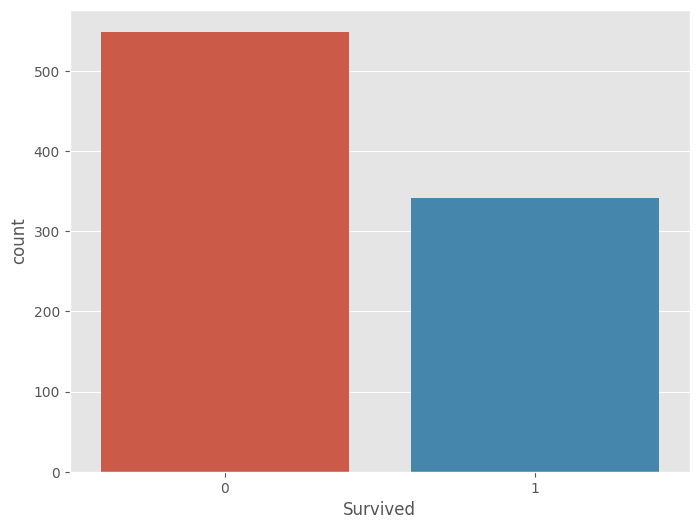

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data= train)

From the above figure, we can observe that survived people are less compared to not-survived people.

<AxesSubplot: xlabel='Sex', ylabel='count'>

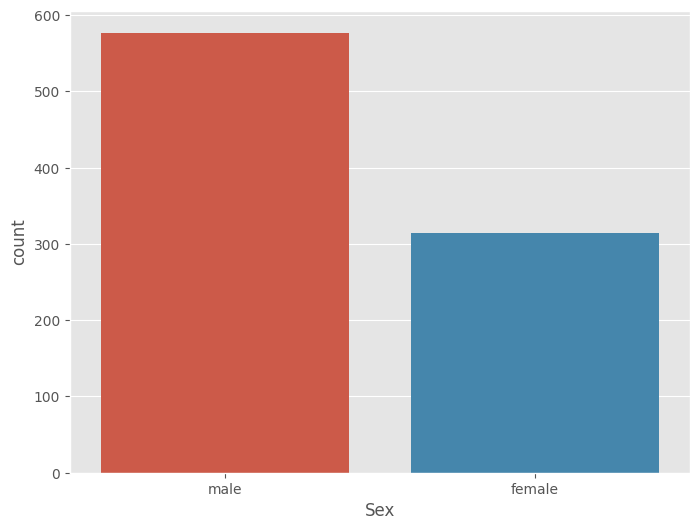

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= train)

males are more compared to females

<AxesSubplot: xlabel='Survived', ylabel='count'>

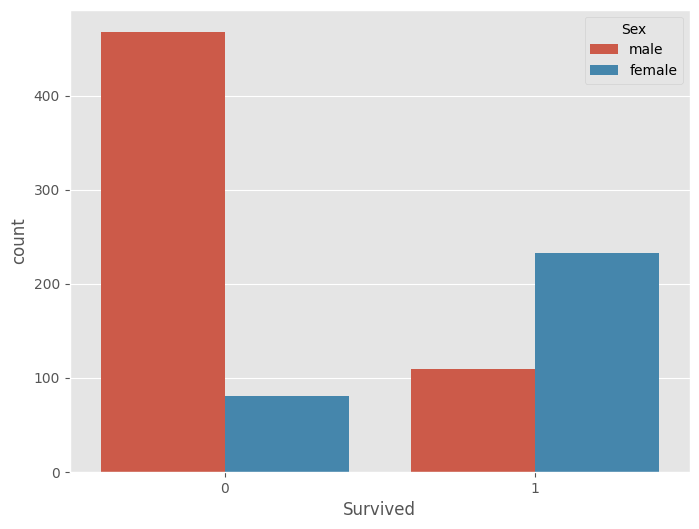

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data= train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

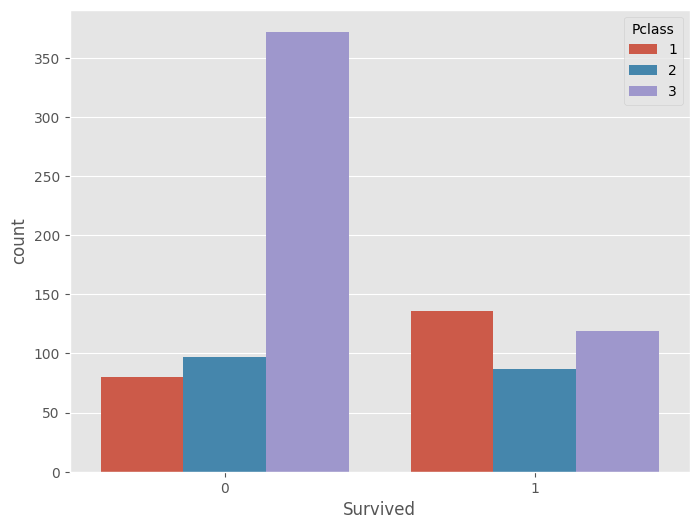

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train)

<AxesSubplot: xlabel='Survived', ylabel='Age'>

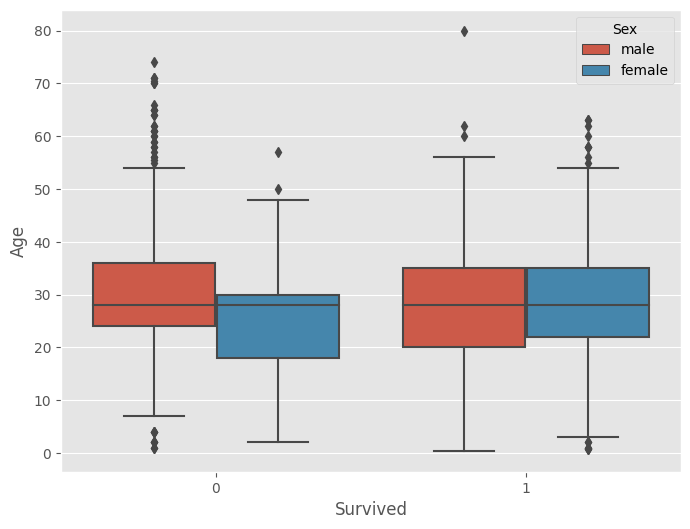

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train)

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

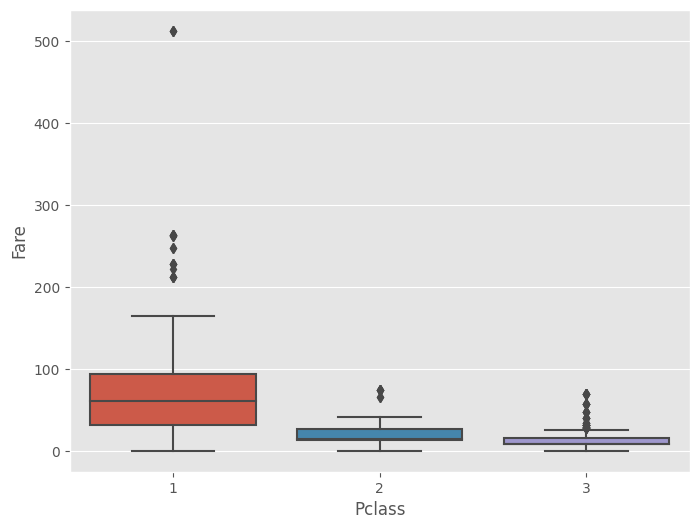

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= train)

Fare is high in Pclass 1 compared to Pclass 2 and Pclass 3

<AxesSubplot: xlabel='Sex', ylabel='count'>

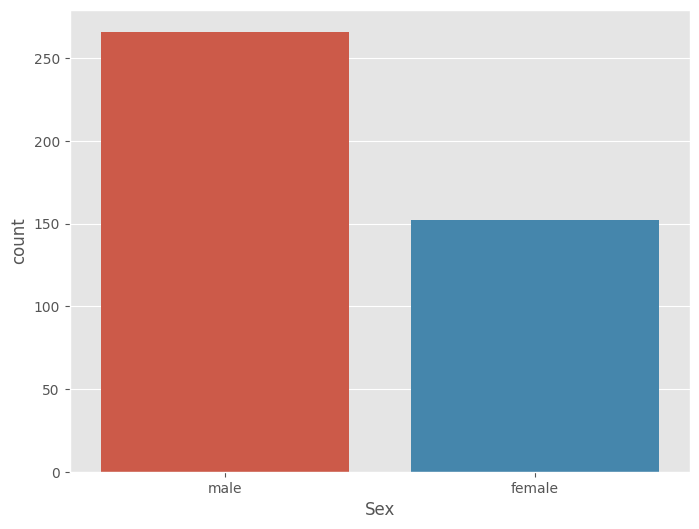

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= test)

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

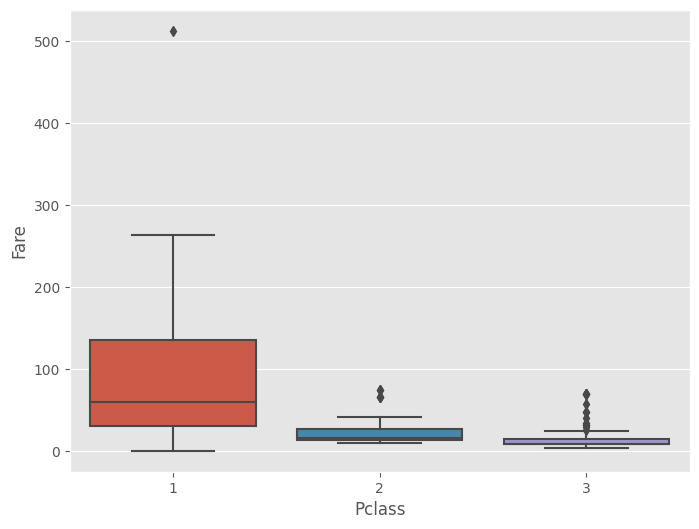

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= test)

Check outliers in the data

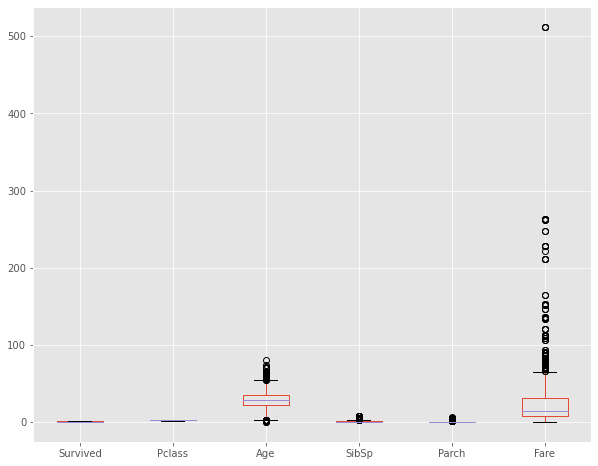

In [40]:

train.plot(kind='box', figsize= (10,8))


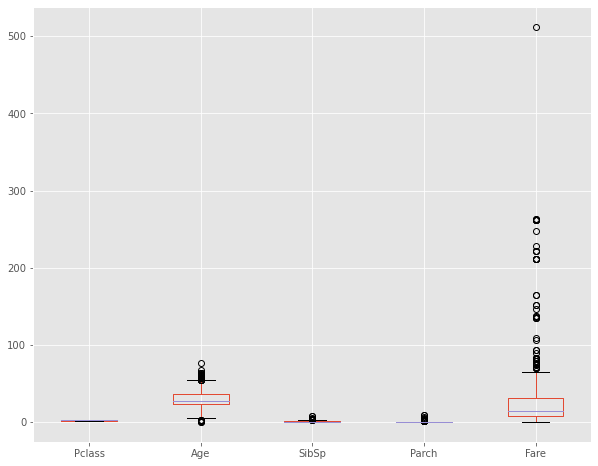

In [43]:
test.plot(kind='box', figsize= (10,8))


One Hot Encoding is used to convert categorical data into numerical data.


In [38]:

train= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [39]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [40]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


Now, lets split the data.

In [41]:
X_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1)

X_test= test

Feature Scaling is used to standardize the independent variables present in the data in a fixed range.

In [42]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [43]:
features= ['Age', 'SibSp', 'Fare']
X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

In [44]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.565736,0.432793,0,-0.502445,0,1,1,0,1
1,0.663861,0.432793,0,0.786845,0,0,0,0,0
2,-0.258337,-0.474545,0,-0.488854,0,1,0,0,1
3,0.433312,0.432793,0,0.420730,0,0,0,0,1
4,0.433312,-0.474545,0,-0.486337,0,1,1,0,1


In [45]:
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.386231,-0.499470,0,-0.497413,0,1,1,1,0
1,1.371370,0.616992,0,-0.512278,0,1,0,0,1
2,2.553537,-0.499470,0,-0.464100,1,0,1,1,0
3,-0.204852,-0.499470,0,-0.482475,0,1,1,0,1
4,-0.598908,0.616992,1,-0.417492,0,1,0,0,1


In [46]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [47]:
print(clf.score(X_train, y_train))


0.8058361391694725


In [53]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [54]:
filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)